# Analiza zbioru danych - Wine


In [39]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [40]:
df = pd.read_csv("../dbs/wine/wine.csv")
df.head()

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [41]:
# Liczba klas i ich rozkład
class_distribution = df['Wine'].value_counts()
class_distribution

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [42]:
# Liczba instancji
instance_count = df.shape[0]
instance_count

178

In [43]:
# Liczba i nazwy atrybutów
attribute_count = df.shape[1] - 1  # Odejmujemy 1, ponieważ jedna kolumna to etykieta klasy
attribute_names = df.columns[:-1].tolist()  # Pomijamy kolumnę 'Alcohol'
attribute_count, attribute_names

(13,
 ['Wine',
  'Alcohol',
  'Malic.acid',
  'Ash',
  'Acl',
  'Mg',
  'Phenols',
  'Flavanoids',
  'Nonflavanoid.phenols',
  'Proanth',
  'Color.int',
  'Hue',
  'OD'])

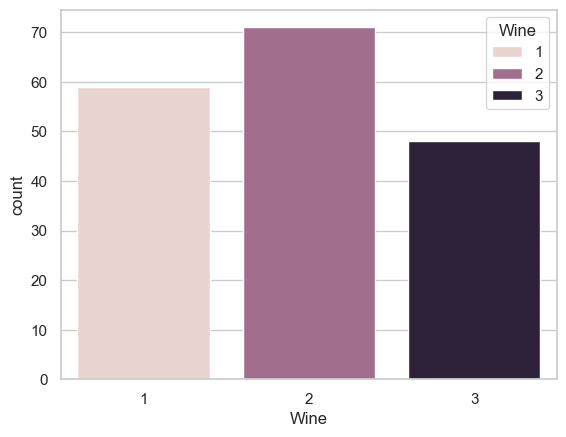

In [44]:
# sns.color_palette("mako", as_cmap=True)
# sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
sns.set_theme( style="whitegrid", palette="muted",)
sns.countplot(x='Wine', data=df, hue='Wine')
plt.show()

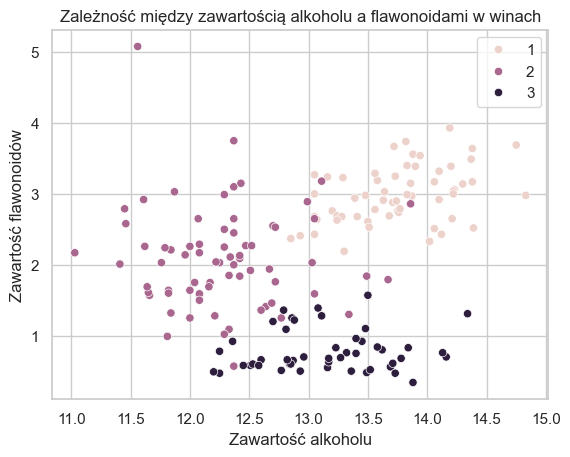

In [45]:
sns.scatterplot(x='Alcohol', y='Flavanoids', hue='Wine', data=df, )
plt.title("Zależność między zawartością alkoholu a flawonoidami w winach")  # Poprawiony tytuł
plt.xlabel("Zawartość alkoholu")  # Poprawiona nazwa osi X
plt.ylabel("Zawartość flawonoidów")  # Poprawiona nazwa osi Y
plt.legend(title="Klasa wina")

plt.legend()
plt.show()

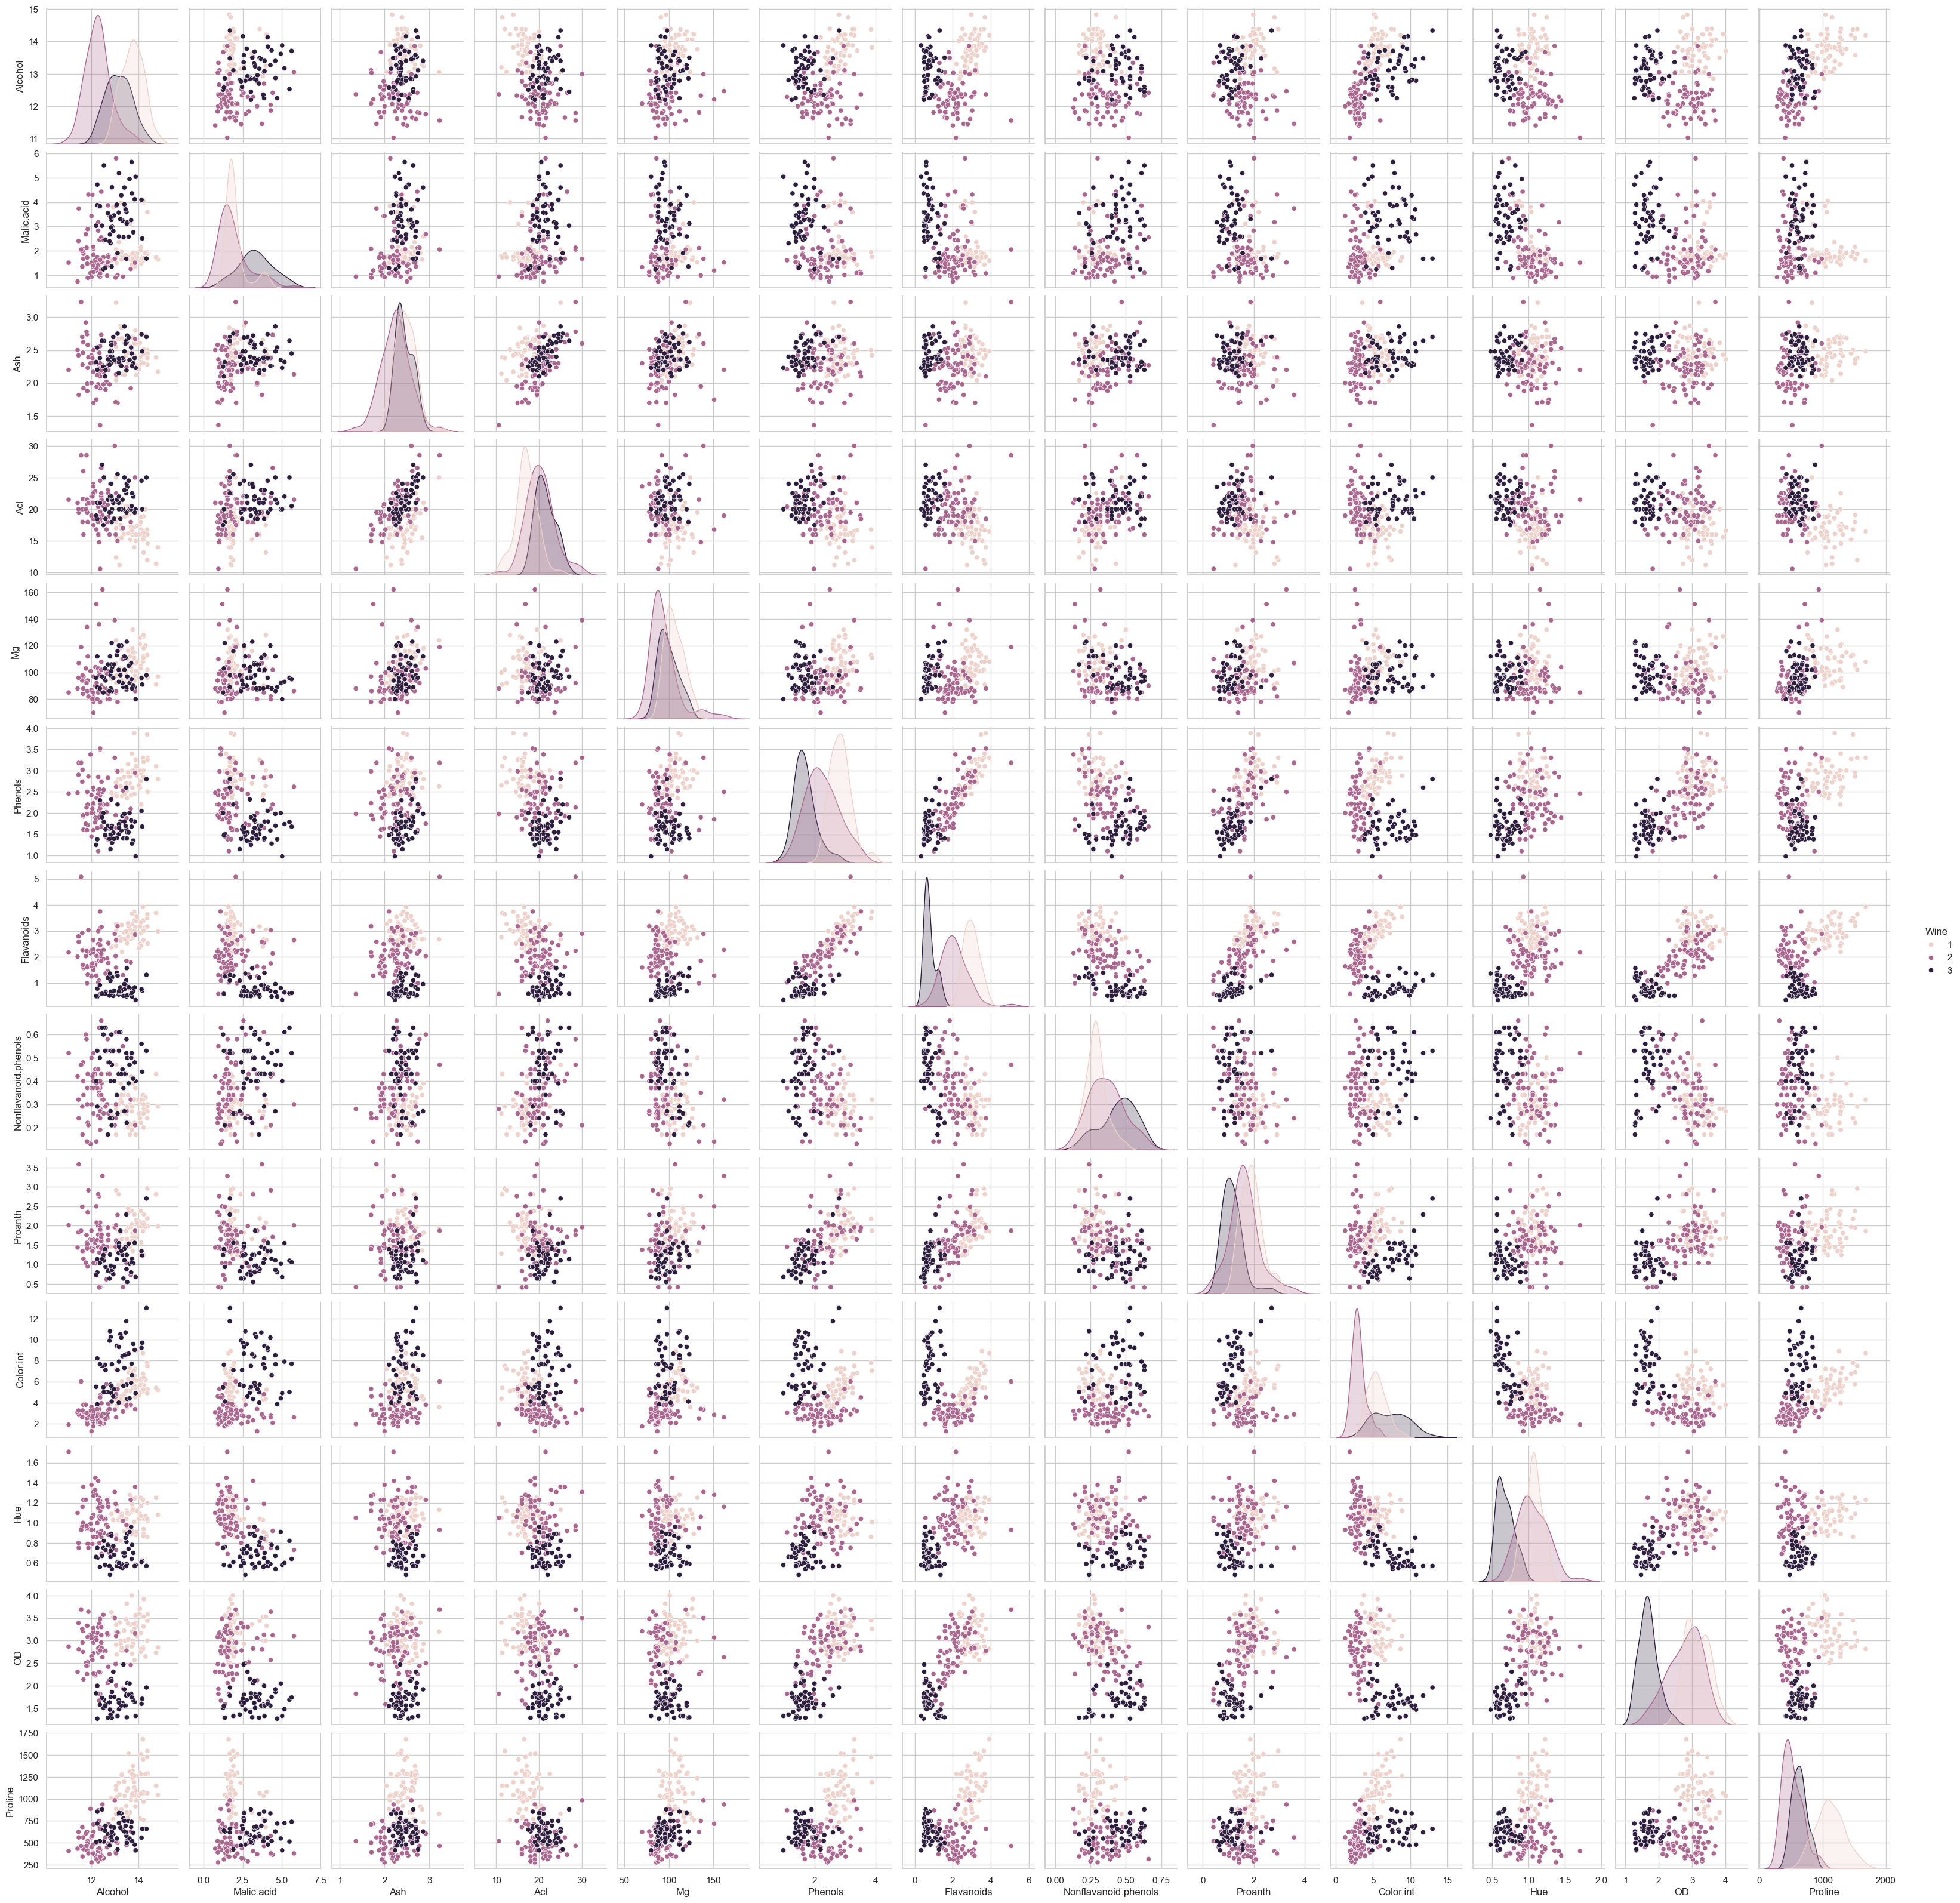

In [50]:
sns.pairplot(df, hue='Wine')
plt.show()

In [51]:
df.corr()

Wine   Alcohol  Malic.acid       Ash       Acl  \
Wine                  1.000000 -0.328222    0.437776 -0.049643  0.517859   
Alcohol              -0.328222  1.000000    0.094397  0.211545 -0.310235   
Malic.acid            0.437776  0.094397    1.000000  0.164045  0.288500   
Ash                  -0.049643  0.211545    0.164045  1.000000  0.443367   
Acl                   0.517859 -0.310235    0.288500  0.443367  1.000000   
Mg                   -0.209179  0.270798   -0.054575  0.286587 -0.083333   
Phenols              -0.719163  0.289101   -0.335167  0.128980 -0.321113   
Flavanoids           -0.847498  0.236815   -0.411007  0.115077 -0.351370   
Nonflavanoid.phenols  0.489109 -0.155929    0.292977  0.186230  0.361922   
Proanth              -0.499130  0.136698   -0.220746  0.009652 -0.197327   
Color.int             0.265668  0.546364    0.248985  0.258887  0.018732   
Hue                  -0.617369 -0.071747   -0.561296 -0.074667 -0.273955   
OD                   -0.788230  0.072343   -0.368710  0.003911 -0.276769   
Proline              -0.633717  0.643720   -0.192011  0.223626 -0.440597   

                            Mg   Phenols  Flavanoids  Nonflavanoid.phenols  \
Wine                 -0.209179 -0.719163   -0.847498              0.489109   
Alcohol               0.270798  0.289101    0.236815             -0.155929   
Malic.acid           -0.054575 -0.335167   -0.411007              0.292977   
Ash                   0.286587  0.128980    0.115077              0.186230   
Acl                  -0.083333 -0.321113   -0.351370              0.361922   
Mg                    1.000000  0.214401    0.195784             -0.256294   
Phenols               0.214401  1.000000    0.864564             -0.449935   
Flavanoids            0.195784  0.864564    1.000000             -0.537900   
Nonflavanoid.phenols -0.256294 -0.449935   -0.537900              1.000000   
Proanth               0.236441  0.612413    0.652692             -0.365845   
Color.int             0.199950 -0.055136   -0.172379              0.139057   
Hue                   0.055398  0.433681    0.543479             -0.262640   
OD                    0.066004  0.699949    0.787194             -0.503270   
Proline               0.393351  0.498115    0.494193             -0.311385   

                       Proanth  Color.int       Hue        OD   Proline  
Wine                 -0.499130   0.265668 -0.617369 -0.788230 -0.633717  
Alcohol               0.136698   0.546364 -0.071747  0.072343  0.643720  
Malic.acid           -0.220746   0.248985 -0.561296 -0.368710 -0.192011  
Ash                   0.009652   0.258887 -0.074667  0.003911  0.223626  
Acl                  -0.197327   0.018732 -0.273955 -0.276769 -0.440597  
Mg                    0.236441   0.199950  0.055398  0.066004  0.393351  
Phenols               0.612413  -0.055136  0.433681  0.699949  0.498115  
Flavanoids            0.652692  -0.172379  0.543479  0.787194  0.494193  
Nonflavanoid.phenols -0.365845   0.139057 -0.262640 -0.503270 -0.311385  
Proanth               1.000000  -0.025250  0.295544  0.519067  0.330417  
Color.int            -0.025250   1.000000 -0.521813 -0.428815  0.316100  
Hue                   0.295544  -0.521813  1.000000  0.565468  0.236183  
OD                    0.519067  -0.428815  0.565468  1.000000  0.312761  
Proline               0.330417   0.316100  0.236183  0.312761  1.000000

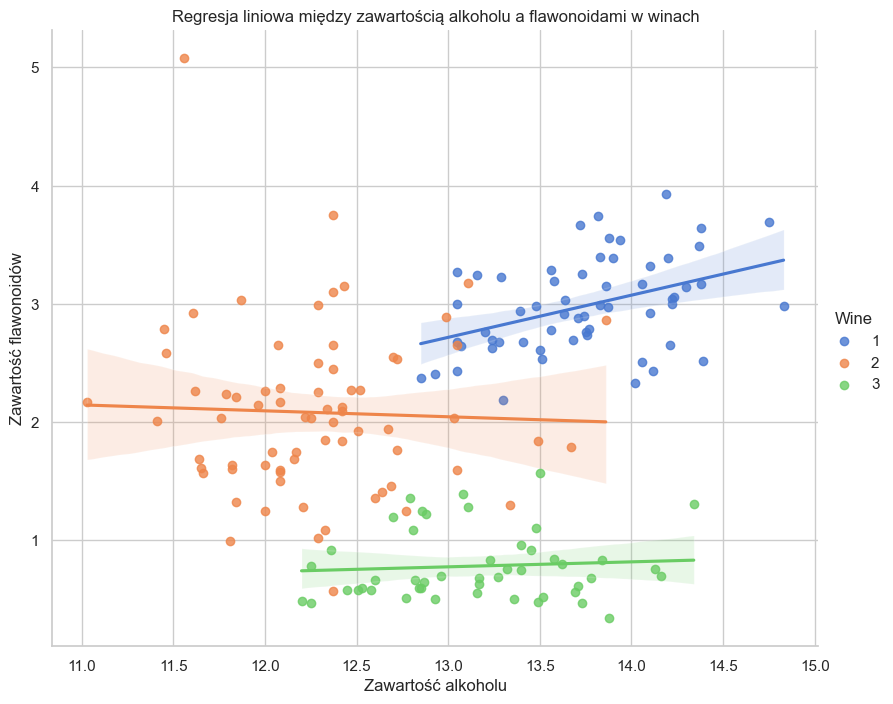

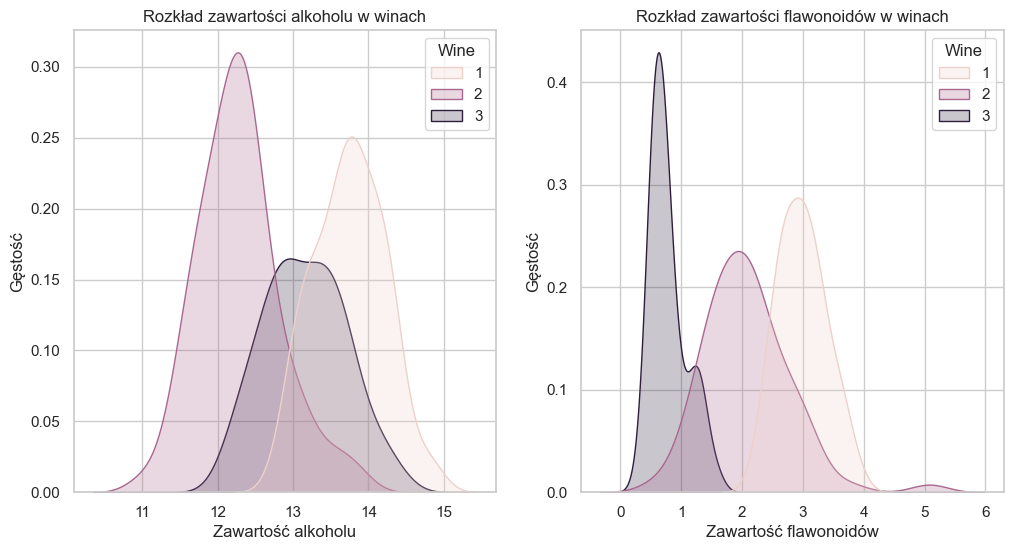

In [46]:
sns.lmplot(x="Alcohol", y="Flavanoids", hue="Wine", data=df, height=7, aspect=1.2)
plt.title("Regresja liniowa między zawartością alkoholu a flawonoidami w winach")  # Poprawiony tytuł
plt.xlabel("Zawartość alkoholu")  # Poprawiona nazwa osi X
plt.ylabel("Zawartość flawonoidów")  # Poprawiona nazwa osi Y
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="Alcohol", hue="Wine", fill=True)
plt.title('Rozkład zawartości alkoholu w winach')  # Poprawiony tytuł
plt.xlabel("Zawartość alkoholu")  # Poprawiona nazwa osi X
plt.ylabel("Gęstość")  # Poprawiona nazwa osi Y

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Flavanoids", hue="Wine", fill=True)
plt.title('Rozkład zawartości flawonoidów w winach')  # Poprawiony tytuł
plt.xlabel("Zawartość flawonoidów")  # Poprawiona nazwa osi X
plt.ylabel("Gęstość")  # Poprawiona nazwa osi Y


plt.show()

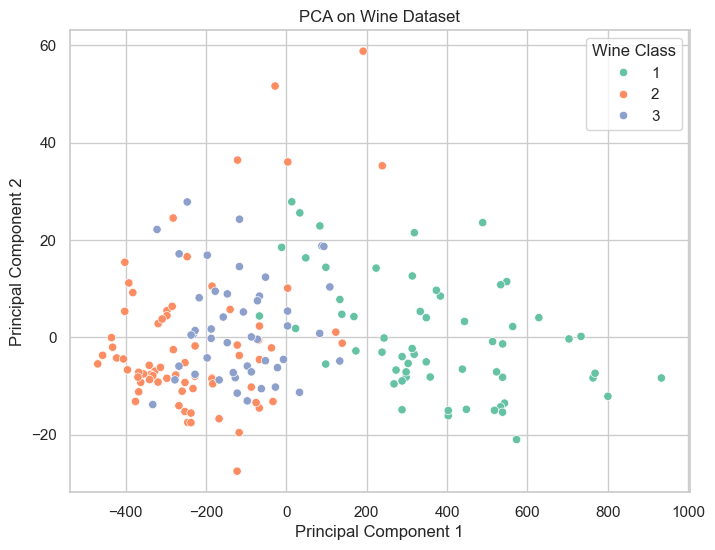

In [47]:
# PCA dla danych bez normalizacji
features = df.columns[1:]  # Pobieranie nazw cech, pomijając pierwszą kolumnę, która jest etykietą klasy
x = df.loc[:, features].values

# Zastosowanie PCA do redukcji wymiarów do 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Tworzenie DataFrame dla wyników PCA
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Wine'] = df['Wine']

# Rysowanie wykresu wyników PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Wine", data=pca_df, palette="Set2")
plt.title('PCA on Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Wine Class")
plt.show()

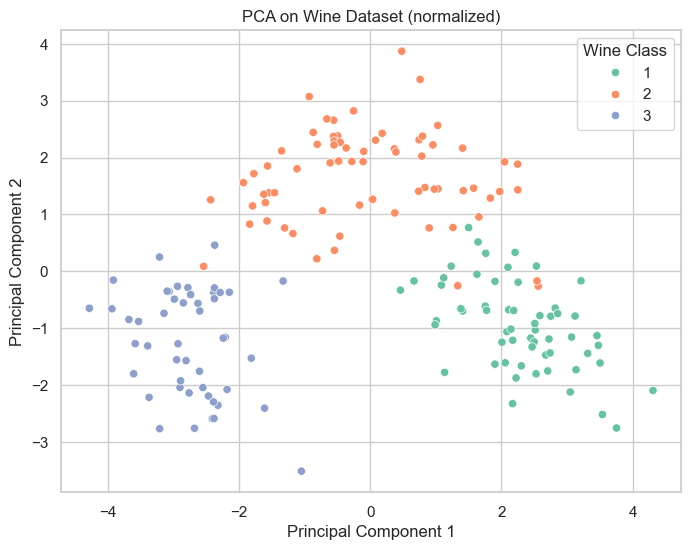

In [48]:
from sklearn.preprocessing import StandardScaler

# PCA dla danych znormalizowanych 
features = df.columns[1:]  # Pobieranie nazw cech, pomijając pierwszą kolumnę, która jest etykietą klasy
x = df.loc[:, features].values

# Normalizacja danych
x = StandardScaler().fit_transform(x)

# Zastosowanie PCA do redukcji wymiarów do 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Tworzenie DataFrame dla wyników PCA
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Wine'] = df['Wine']

# Rysowanie wykresu wyników PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Wine", data=pca_df, palette="Set2")
plt.title('PCA on Wine Dataset (normalized)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Wine Class")
plt.show()

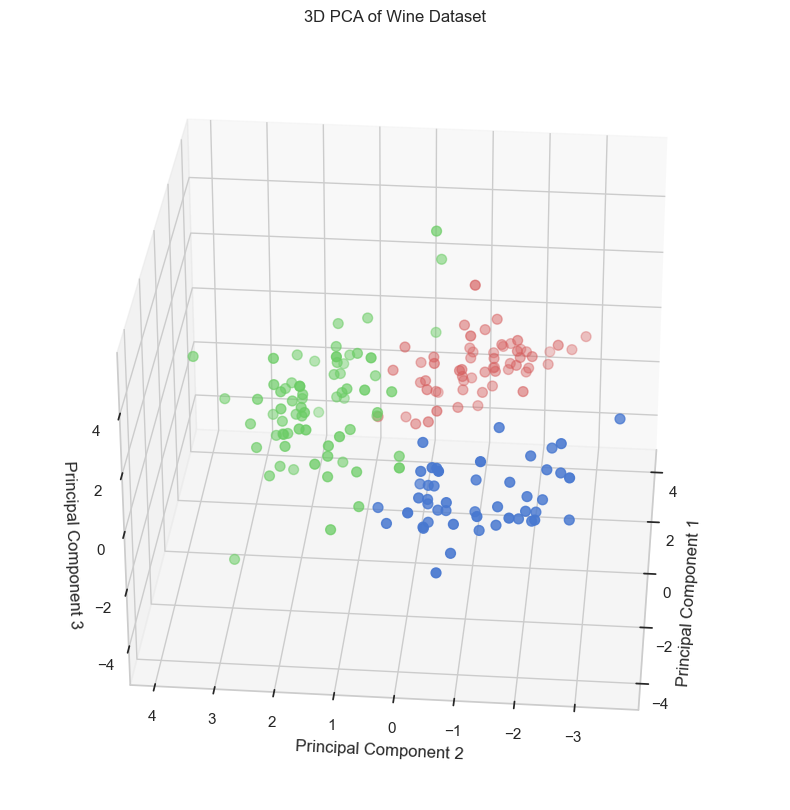

In [49]:
from mpl_toolkits.mplot3d import Axes3D

# PCA do redukcji do 3 głównych komponentów
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(
    data=principalComponents_3d,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)

# Dodanie etykiet klas do nowego DataFrame
finalDf_3d = pd.concat([principalDf_3d, df[['Wine']]], axis=1)

# Wykres 3D PCA
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Paleta kolorów dla klas wina
colors = {1: 'r', 2: 'g', 3: 'b'}
ax.scatter(finalDf_3d['Principal Component 1'], 
           finalDf_3d['Principal Component 2'], 
           finalDf_3d['Principal Component 3'],
           c=finalDf_3d['Wine'].apply(lambda x: colors[x]), s=50)

ax.view_init(elev=30, azim=185)

ax.set_title('3D PCA of Wine Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
